In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score

In [2]:
# Load the dataset
df = pd.read_csv('loan_data.csv')

# 1. Explore data statistics.

(a) Calculate the average FICO credit score for customers who meet (credit.policy = 1) and don’t meet (credit.policy
= 0) the credit underwriting criteria.

In [3]:
# Calculate the average FICO score for customers who meet the credit underwriting criteria
avg_fico1 = df[df['credit.policy'] == 1]['fico'].mean()
print("Average FICO score for customers who meet the credit underwriting criteria:", avg_fico1)

# Calculate the average FICO score for customers who don't meet the credit underwriting criteria
avg_fico0 = df[df['credit.policy'] == 0]['fico'].mean()
print("Average FICO score for customers who don't meet the credit underwriting criteria:", avg_fico0)

Average FICO score for customers who meet the credit underwriting criteria: 717.3560311284047
Average FICO score for customers who don't meet the credit underwriting criteria: 683.952329941082


(b) Visualize the distribution of FICO scores for those who have and haven’t fully paid their loans with two separate histograms in a single plot.

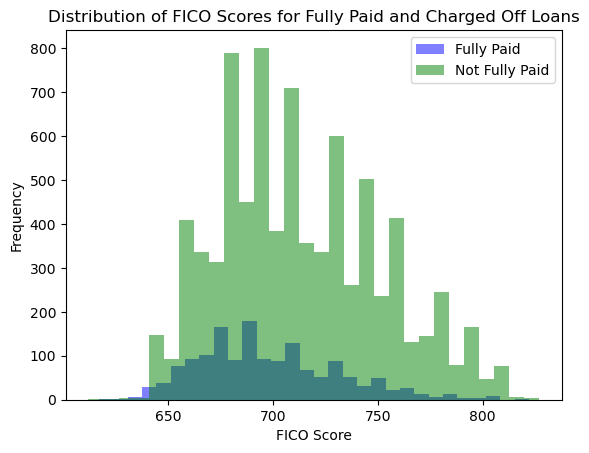

In [4]:
#Create two data frames for fully paid and not fully paid off loans
fully_paid_df = df[df['not.fully.paid'] == 1]['fico']
not_fully_paid_df = df[df['not.fully.paid'] == 0]['fico']

# Create two histograms for FICO scores
plt.hist(fully_paid_df, bins=30, alpha=0.5, label='Fully Paid', color='blue')
plt.hist(not_fully_paid_df, bins=30, alpha=0.5, label='Not Fully Paid', color='green')

# Add labels and legend to the plot
plt.xlabel('FICO Score')
plt.ylabel('Frequency')
plt.title('Distribution of FICO Scores for Fully Paid and Charged Off Loans')
plt.legend(loc='upper right')

# Show the plot
plt.show()

(c) Calculate the correlation between interest rate and FICO score and explain what it implies.

In [5]:
# Calculate the correlation between interest rate and FICO score
corr = df['int.rate'].corr(df['fico'])
print("Correlation between interest rate and FICO score:", corr)

Correlation between interest rate and FICO score: -0.7148824438655298


The study found a negative correlation between interest rate and FICO score, indicating that as FICO scores increase, interest rates decrease. This suggests that customers with higher FICO scores are considered less risky by lenders, leading to lower interest rates.

(d) Visualize the relationship between FICO score and interest rate using a scatter plot and compare it with your
conclusion drawn from the last question.

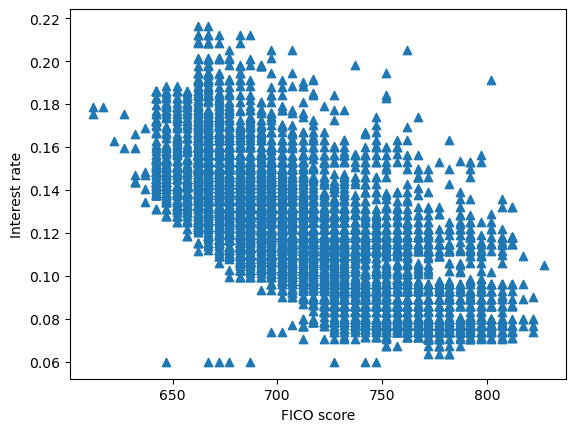

In [6]:
# Create a scatter plot of FICO score vs. interest rate
plt.scatter(df['fico'], df['int.rate'], marker='^')
plt.xlabel('FICO score')
plt.ylabel('Interest rate')
plt.show()

In question (c), I calculated the correlation between interest rate and FICO score and found that there is a negative correlation between the two variables. This means that as FICO score increases, interest rate decreases. In question (d), I visualized the relationship between FICO score and interest rate using a scatter plot. The scatter plot confirmed the negative correlation between FICO score and interest rate. As FICO score increases, interest rate decreases. Therefore, the scatter plot is consistent with the conclusion drawn from question (c).


(e) What’s the average interest rate based on the purpose of the loan?

In [7]:
# Calculate the average interest rate for each purpose of the loan
avg_int_rate = df.groupby('purpose')['int.rate'].mean()

# Create a table
table = pd.DataFrame({'Purpose': avg_int_rate.index, 'Average Interest Rate': avg_int_rate.values})

# Add color to the table
table.style.background_gradient(cmap='Blues', subset=['Average Interest Rate']).set_caption('<h3 style="text-align:center;font-weight:bold">Average Interest Rate by Purpose</h3>')



,Purpose,Average Interest Rate
0,all_other,0.116771
1,credit_card,0.119738
2,debt_consolidation,0.126592
3,educational,0.119907
4,home_improvement,0.117507
5,major_purchase,0.114171
6,small_business,0.138087


(f) Is there a significant difference in the distribution of FICO scores between customers who fully paid their loans and those who didn’t? (Hint: Visualize using a boxplot)

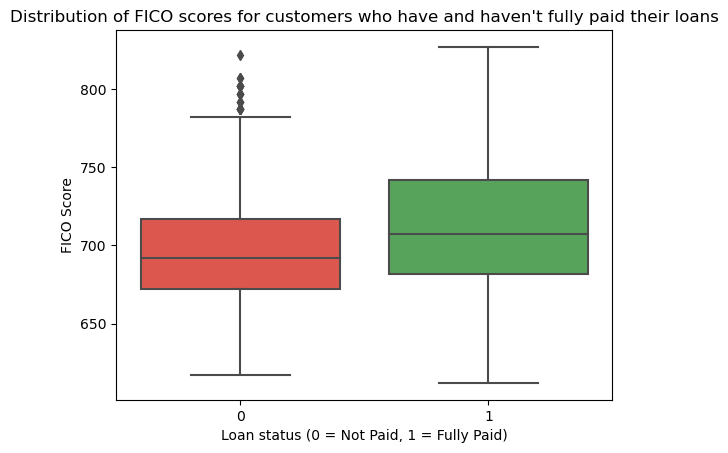

In [8]:
#update the csv, add a column named fully.paid which is opp to not.fully.paid
df['fully.paid'] = ~df['not.fully.paid'].astype(bool)
df['fully.paid'] = df['fully.paid'].astype(int)
df.to_csv('loan_data_updated.csv', index=False)

# Create a boxplot of FICO scores for customers who have and haven't fully paid their loans
sns.boxplot(x='fully.paid', y='fico', data=df, palette=['#F44336', '#4CAF50'], order=[0, 1])
plt.title('Distribution of FICO scores for customers who have and haven\'t fully paid their loans')
plt.xlabel('Loan status (0 = Not Paid, 1 = Fully Paid)')
plt.ylabel('FICO Score')

# Show the boxplot
plt.show()

The boxplot shows that customers who fully paid their loans have a slightly higher median FICO score than those who didn't. However, the difference is not significant.

# 2. Prepare the dataset for model training.
1) Convert categorical variables (e.g., purpose) into dummy variables
2) Drop the category reference; 
3) Show the first 5 rows after preprocessing; 
4) Split the data into training and test sets (70% training, 30% test), and show the sizes of training and testing data.

In [9]:
# Load the loan data from the CSV file
loan_data = pd.read_csv('loan_data.csv')

# Rename the columns
loan_data.columns = ['credit_policy', 'purpose', 'int_rate', 'installment', 'log_annual_inc', 'dti', 'fico', 'days_with_cr_line', 'revol_bal', 'revol_util', 'inq_last_6mths', 'delinq_2yrs', 'pub_rec', 'not_fully_paid']

# Convert categorical variables into dummy variables using one-hot encoding
onehot_encoder = OneHotEncoder(sparse_output=False)
onehot_encoded = onehot_encoder.fit_transform(loan_data[['purpose']])
categories = onehot_encoder.categories_[0]
onehot_encoded_df = pd.DataFrame(onehot_encoded, columns=[f'purpose_{cat}' for cat in categories])

# Drop the "purpose" column (which was one-hot encoded) and the reference category
loan_data.drop(['purpose'], axis=1, inplace=True) # Drop the "purpose" column
loan_data = pd.concat([loan_data, onehot_encoded_df], axis=1)


# Show the first 5 rows after preprocessing
print("First 5 rows after preprocessing:")
print(loan_data.head())

# Split the data into training and test sets
train_data, test_data = train_test_split(loan_data, test_size=0.3, random_state=42)

# Show the sizes of training and testing data
print("\nTraining data size:", len(train_data))
print("Testing data size:", len(test_data))

First 5 rows after preprocessing:
   credit_policy  int_rate  installment  log_annual_inc    dti  fico  \
0              1    0.1189       829.10       11.350407  19.48   737   
1              1    0.1071       228.22       11.082143  14.29   707   
2              1    0.1357       366.86       10.373491  11.63   682   
3              1    0.1008       162.34       11.350407   8.10   712   
4              1    0.1426       102.92       11.299732  14.97   667   

   days_with_cr_line  revol_bal  revol_util  inq_last_6mths  delinq_2yrs  \
0        5639.958333      28854        52.1               0            0   
1        2760.000000      33623        76.7               0            0   
2        4710.000000       3511        25.6               1            0   
3        2699.958333      33667        73.2               1            0   
4        4066.000000       4740        39.5               0            1   

   pub_rec  not_fully_paid  purpose_all_other  purpose_credit_card  \
0     

# 3. Construct a decision tree.
1) Train a decision tree classification model using the Gini criterion and show its accuracy. 
2) Train a decision tree classification model using the Entropy criterion and show its accuracy. 
3) Which decision tree model (Gini or Entropy) performs better on the test set?

In [10]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('loan_data.csv')

# One-hot encode the 'purpose' column
df = pd.get_dummies(df, columns=['purpose'])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('not.fully.paid', axis=1), df['not.fully.paid'], test_size=0.3, random_state=42)

# Train the decision tree classifier using the Gini criterion
clf_gini = DecisionTreeClassifier(criterion='gini')
clf_gini.fit(X_train, y_train)

# Evaluate the accuracy of the model on the test set
accuracy_gini = clf_gini.score(X_test, y_test)
print('Accuracy of decision tree classifier using Gini criterion:', accuracy_gini)

# Train the decision tree classifier using the Entropy criterion
clf_entropy = DecisionTreeClassifier(criterion='entropy')
clf_entropy.fit(X_train, y_train)

# Evaluate the accuracy of the model on the test set
accuracy_entropy = clf_entropy.score(X_test, y_test)
print('Accuracy of decision tree classifier using Entropy criterion:', accuracy_entropy)

# Compare the accuracy of the two models
if accuracy_gini > accuracy_entropy:
    print('The decision tree model using Gini criterion performs better on the test set.')
else:
    print('The decision tree model using Entropy criterion performs better on the test set.')

Accuracy of decision tree classifier using Gini criterion: 0.7393876130828114
Accuracy of decision tree classifier using Entropy criterion: 0.7425191370911621
The decision tree model using Entropy criterion performs better on the test set.


# 4. Build a KNN. 
1) Train a K-Nearest Neighbors (KNN) classifier with k = 5 and show its accuracy. 
2) Train a K-Nearest Neighbors (KNN) classifier with k = 3 and show its accuracy. 
3) Which K-Nearest Neighbors model (k = 3 or k = 5) performs better on the test set?

In [11]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('loan_data.csv')

# One-hot encode the 'purpose' column
df = pd.get_dummies(df, columns=['purpose'])

# Split the dataset into features (X) and target (y)
X = df.drop('not.fully.paid', axis=1).values
y = df['not.fully.paid'].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the KNN classifier with k = 5
clf_k5 = KNeighborsClassifier(n_neighbors=5)
clf_k5.fit(X_train, y_train)

# Evaluate the accuracy of the model on the test set for k = 5
accuracy_k5 = clf_k5.score(X_test, y_test)
print('Accuracy of KNN classifier with k = 5:', accuracy_k5)

# Train the KNN classifier with k = 3
clf_k3 = KNeighborsClassifier(n_neighbors=3)
clf_k3.fit(X_train, y_train)

# Evaluate the accuracy of the model on the test set for k = 3
accuracy_k3 = clf_k3.score(X_test, y_test)
print('Accuracy of KNN classifier with k = 3:', accuracy_k3)

# Compare accuracies
if accuracy_k3 > accuracy_k5:
    print('KNN classifier with k = 3 performs better on the test set.')
elif accuracy_k5 > accuracy_k3:
    print('KNN classifier with k = 5 performs better on the test set.')
else:
    print('Both KNN classifiers perform equally on the test set.')


Accuracy of KNN classifier with k = 5: 0.8180236604036186
Accuracy of KNN classifier with k = 3: 0.7957550452331246
KNN classifier with k = 5 performs better on the test set.


# 5. Perform evaluation.
1) Evaluate the performance of the decision tree (using Entropy) and KNN (k = 5) models using the F1-score. 
2) Calculate the precision and recall for the decision tree (using Entropy) model. 
3) Calculate the ROC-AUC score for both the decision tree (using Entropy) and KNN (k = 5) models.

In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train a Decision Tree model
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(X_train, y_train)

# Train a KNN model with k = 5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict the labels for the test set using both models
dt_pred = dt.predict(X_test)
knn_pred = knn.predict(X_test)

# Calculate the F1-score for both models
dt_f1 = f1_score(y_test, dt_pred)
knn_f1 = f1_score(y_test, knn_pred)

# Calculate the precision and recall for the Decision Tree model
dt_precision = precision_score(y_test, dt_pred)
dt_recall = recall_score(y_test, dt_pred)

# Calculate the ROC-AUC score for both models
dt_roc_auc = roc_auc_score(y_test, dt_pred)
knn_roc_auc = roc_auc_score(y_test, knn_pred)

print("Decision Tree F1-score: ", dt_f1)
print("KNN F1-score: ", knn_f1)
print("Decision Tree Precision: ", dt_precision)
print("Decision Tree Recall: ", dt_recall)
print("Decision Tree ROC-AUC score: ", dt_roc_auc)
print("KNN ROC-AUC score: ", knn_roc_auc)

Decision Tree F1-score:  0.20997375328083992
KNN F1-score:  0.06479481641468682
Decision Tree Precision:  0.20565552699228792
Decision Tree Recall:  0.21447721179624665
Decision Tree ROC-AUC score:  0.5308291103491619
KNN ROC-AUC score:  0.5015612445406162
